In [1]:
from functools import partial

import jax.numpy as jnp
import jax.random as jr
import jax
import matplotlib.pyplot as plt

from src.data_generate_sde import sde_kunita
from src.data_generate_sde import sde_utils
import src.data_generate_sde.time as time
from src import plotting

In [2]:
def x0(num_landmarks):
    x0_1 = jnp.linspace(0, 1, num_landmarks)
    x0_2 = jnp.zeros(num_landmarks)
    x0 = jnp.stack([x0_1, x0_2], axis=1).flatten()
    return x0

def sample_circle(num_landmarks: int, radius=1., centre=jnp.asarray([0, 0])) -> jnp.ndarray:
    theta = jnp.linspace(0, 2 * jnp.pi, num_landmarks, endpoint=False)
    x = jnp.cos(theta)
    y = jnp.sin(theta)
    return (radius * jnp.stack([x, y], axis=1) + centre).flatten()

lots_of_landmarks = 1000

x0_10 = sample_circle(5)
x0_lots = sample_circle(lots_of_landmarks)

num_trajs = 2

T = 1.
N = 100

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

data_fn_lots = sde_kunita.data_forward(x0_lots, T, N)
_, trajs_lots, _ = data_fn_lots(keys)

data_fn_less = sde_kunita.data_forward(x0_10, T, N)
_, trajs_10, _ = data_fn_less(keys)



In [3]:
trajs_lots = trajs_lots.reshape(num_trajs, N, lots_of_landmarks, 2)
trajs_less = trajs_10.reshape(num_trajs, N, 5, 2)

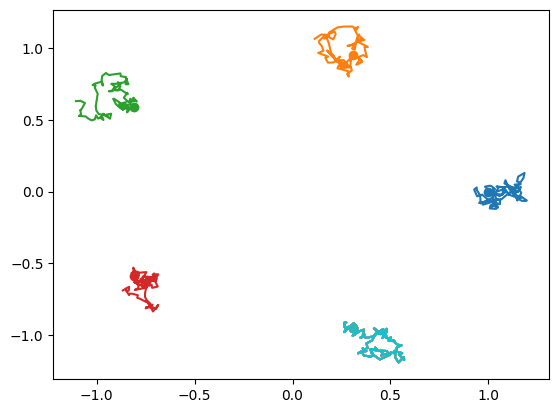

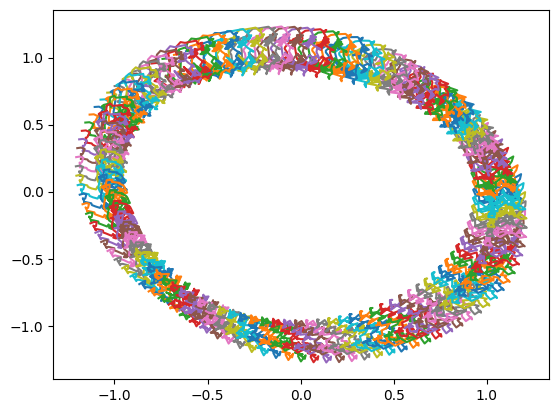

In [4]:
for landmark in jnp.arange(0, 10, 1):
    plt.plot(trajs_less[0, :, landmark, 0], trajs_less[0, :, landmark, 1])
    plt.scatter(trajs_less[0, 0, landmark, 0], trajs_less[0, 0, landmark, 1])
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 10):
    plt.plot(trajs_lots[0, :, landmark, 0], trajs_lots[0, :, landmark, 1])
plt.show()


In [5]:
def x0(num_landmarks):
    x0_1 = jnp.linspace(0, 1, num_landmarks)
    x0_2 = jnp.zeros(num_landmarks)
    x0 = jnp.stack([x0_1, x0_2], axis=1).flatten()
    return x0

lots_of_landmarks = 100
x0_10 = sample_circle(10)
x0_lots = sample_circle(lots_of_landmarks)

time_grid = time.grid(0, T, N)
rev_drift, rev_diffusion = sde_kunita.vector_fields_reverse()

rev_trajs_10 = jax.vmap(sde_utils.solution, (0, None, None, None, None, None))(keys, time_grid, x0_10, rev_drift, rev_diffusion, (2*sde_kunita.noise_dim(),))
rev_trajs_lots = jax.vmap(sde_utils.solution, (0, None, None, None, None, None))(keys, time_grid, x0_lots, rev_drift, rev_diffusion, (2*sde_kunita.noise_dim(),))

# , bm_shape=(2*sde_kunita.noise_dim(),)

In [6]:
rev_trajs_10 = rev_trajs_10.reshape(num_trajs, N, 10, 2)
rev_trajs_lots = rev_trajs_lots.reshape(num_trajs, N, lots_of_landmarks, 2)

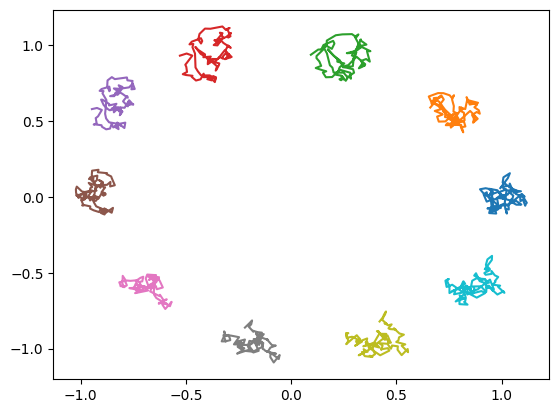

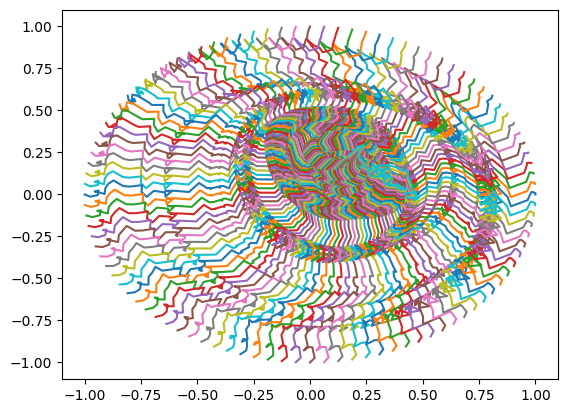

In [7]:
for landmark in jnp.arange(0, 10, 1):
    plt.plot(rev_trajs_10[0, :, landmark, 0], rev_trajs_10[0, :, landmark, 1])
    
# plt.xlim((0, 1))
# plt.ylim((-1,0))
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 1):
    plt.plot(rev_trajs_lots[0, :, landmark, 0], rev_trajs_lots[0, :, landmark, 1])
    
# plt.xlim((0, 1))
# plt.ylim((-1,0))
plt.show()


In [8]:
grid_range=(-1, 2)
grid_size=5
def grid():
    grid = jnp.linspace(*grid_range, grid_size)
    grid = jnp.stack(jnp.meshgrid(grid, grid, indexing="xy"), axis=-1)
    return grid

print(grid())

[[[-1.   -1.  ]
  [-0.25 -1.  ]
  [ 0.5  -1.  ]
  [ 1.25 -1.  ]
  [ 2.   -1.  ]]

 [[-1.   -0.25]
  [-0.25 -0.25]
  [ 0.5  -0.25]
  [ 1.25 -0.25]
  [ 2.   -0.25]]

 [[-1.    0.5 ]
  [-0.25  0.5 ]
  [ 0.5   0.5 ]
  [ 1.25  0.5 ]
  [ 2.    0.5 ]]

 [[-1.    1.25]
  [-0.25  1.25]
  [ 0.5   1.25]
  [ 1.25  1.25]
  [ 2.    1.25]]

 [[-1.    2.  ]
  [-0.25  2.  ]
  [ 0.5   2.  ]
  [ 1.25  2.  ]
  [ 2.    2.  ]]]


In [9]:
assert False

AssertionError: 

In [ ]:

trajectories = jax.vmap(sde_utils.solution, (0, None, 0, None, None))(traj_keys, time_grid, x0, drift, diffusion)


rev_keys = jax.random.split(key, num_trajectories)
drift_rev, diffusion_rev = ou.vector_fields_reverse()
rev = jax.vmap(sde_utils.solution, (0, None, None, None, None))(traj_keys, time_grid, y, drift_rev, diffusion_rev)

for traj in rev:
    plt.plot(time_grid, traj)
plt.title("reverse")
plt.show()
print(rev[0][-1])

In [ ]:
data_fn = ou.data_reverse(y, T, N)
ts, rev, corr = data_fn(rev_keys)

for correct in corr:
    plt.scatter(ts[0, -1], correct)
plt.title("correction")
plt.show()

In [ ]:
cond_keys = jax.random.split(key, num_trajectories)
score_fn = partial(ou.score, T=T, y=jnp.asarray(y))
cond = jax.vmap(utils.conditioned, (0, None, None, None, None, None))(traj_keys, time_grid, x0, score_fn, drift, diffusion).ys

for traj in cond:
    plt.plot(time_grid, traj)
plt.title("conditioned")
plt.show()


In [ ]:
# Plot trajectories made with ou.important_reverse_and_correction

keys = jax.random.split(key, num_trajectories)
trajs = (jax.vmap(utils.important_reverse_and_correction, (0, None, None, None, None, None, None))
         (keys, time_grid, x0, y, drift_rev, diffusion_rev, ou.drift_correction).ys)

print(trajs.shape)

revs = trajs[..., :-1]
corrs = trajs[..., :50 , -1]

for rev in revs:
    plt.plot(time_grid, rev)
plt.title("reverse")
plt.show()

for corr in corrs:
    plt.plot(time_grid[:50], corr)
plt.title("correction")
plt.show()

In [ ]:
def h(t, x, *args):
    assert x.ndim == 1
    zero_array = jnp.zeros(shape=(x.size,))
    return jax.lax.cond(t == T, lambda f: zero_array, lambda f: -(jnp.asarray(x0) - f) / (T - t), x)


h_y = jax.vmap(h, (0, 0))(time_grid, revs[0])


In [ ]:
plt.plot(time_grid, h_y)

In [ ]:
from src.data_generate_sde import guided_process

keys = jax.random.split(key, num_trajectories)

data_fn = ou.data_reverse_guided(x0, y, T, N)
ts, trajs, corr = data_fn(keys)

for traj in trajs:
    plt.plot(ts[0], traj)

